# Boston Marathon 2017 


### Discription
This data set contains the Boston Marathon result from 2017.  It was compiled by a user on Kaggle who scrapped the information from the official marathon website.  It contains the name, age, gender, country, city and state of the participants. It gives the race times at 9 different stages of the race, including the official finish time, pace and place.  

I thought it would be interesting to see what this data set can tell us about the populations male and female runners.   I wanted to see if there was a big difference between the two gender groups and if this difference is significant and compare other factors that also affect performance such as age.  
## Questions I want to answer
Q1. Which country brought the fastest runners?

Q2. Do male runners run faster than female runners?

Q3. How do the marathon times change with age?


In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#make the .csv file into data frame
marathon_results_2017 = pd.read_csv('marathon_results_2017.csv')
%matplotlib inline
#results = sns.load_dataset('marathon_results_2017')

First lets take a look at what is in the data set with the .columns method.  

In [2]:
marathon_results_2017.columns # take a look at the variables 

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

Now we use the .loc method to select the data frame variables we are interested in.  Then we take a look at the data with the .head method.  

In [3]:
graph_data = marathon_results_2017.loc[ : , ['M/F', 'Official Time', 'State', 'Country', 'Age']]

graph_data.head()


,M/F,Official Time,State,Country,Age
0,M,2:09:37,NaN,KEN,24
1,M,2:09:58,OR,USA,30
2,M,2:10:28,NaN,JPN,25
3,M,2:12:08,CA,USA,32
4,M,2:12:35,NaN,KEN,31


In [4]:
Official_Times = marathon_results_2017.loc[ : ,'Official Time']
#makes a series of data from Official Time.  The type is a string, need to convert to number of mins
type(Official_Times[0])==str

True

Now we need to convert the string values in the 'Official Time' column into a type integer so that we can work with it.  I will write a function called convert_time that takes values from 'Official Time' and converts it to number of mins.  

In [5]:
# this function takes a str in the from the Official Time column in the form of 'x:xx:xx'  and 
# converts it into a element on the real line
def convert_time(time):
    for i in range(len(time)):
        if time[i]==':':
            i=i+1
        elif time[i]!=':':
            x = int(time[i])
            #print(x, i, type(x))
            if i == 0:
                hours = x*60
            elif i == 2:
                ten_min = x*10
            elif i == 3:
                mins = x
            elif i == 5:
                ten_sec = x/6
            elif i == 6:
                sec = x/60
    return hours + ten_min + mins + ten_sec + sec

In [6]:
convert_time(Official_Times[0])# test to see if function works

129.61666666666667

Now I make an empty list called converted_times.  Then I write a for loop which will pass the values from the 'Official Time' column to the convert_time() function, then add the returned value to the converted_times list.  Then I add the converted_time list as a column to my graph_data DataFrame.  


In [7]:
converted_times = []
for i in range(len(graph_data)):
    converted_times.append(convert_time(Official_Times[i]))

graph_data['Converted Time'] = converted_times

Now that we have the 'Converted Time' column I don't need 'Official Time' column, so we can get rid of it.  

In [8]:
graph_data.drop('Official Time', axis=1, inplace=True)
graph_data.head()

,M/F,State,Country,Age,Converted Time
0,M,NaN,KEN,24,129.616667
1,M,OR,USA,30,129.966667
2,M,NaN,JPN,25,130.466667
3,M,CA,USA,32,132.133333
4,M,NaN,KEN,31,132.583333


### Summary statistics
Now that we have the data we want to work with lets get an idea of the distribution for the data points with a boxplot and histogram. 

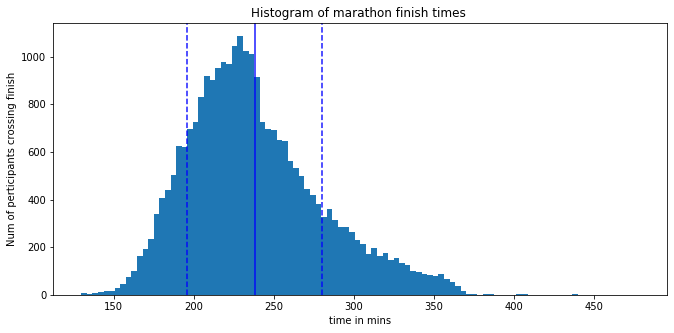

pop mean:  238.05925596365014
 pop var:  1776.45837643277
 pop std:  42.148053056253616


In [9]:
%matplotlib inline
# makes a histogram of converted time 
x = graph_data['Converted Time']
plt.figure(figsize=(11, 5))
plt.hist(x, bins=100) 

plt.ylabel('Num of perticipants crossing finish')
plt.title('Histogram of marathon finish times ')
plt.xlabel('time in mins')
plt.axvline(graph_data['Converted Time'].mean(), color = 'b', alpha = .9)
plt.axvline(graph_data['Converted Time'].mean()+graph_data['Converted Time'].std(), color = 'b', alpha = .9, linestyle = 'dashed')
plt.axvline(graph_data['Converted Time'].mean()-graph_data['Converted Time'].std(), color = 'b', alpha = .9, linestyle = 'dashed')
plt.show()
print('pop mean: ', graph_data['Converted Time'].mean())
print(' pop var: ', graph_data['Converted Time'].var())
print(' pop std: ', graph_data['Converted Time'].std())
pop_mean = graph_data['Converted Time'].mean()
pop_var = graph_data['Converted Time'].var()
pop_std = graph_data['Converted Time'].std()


#blue line is the population mean and the dashed is the SD.
#To answer Q1 we set up a test.  Hypothese: The mean finsh 
#times of US runners is the same as the population of all runner that participated in the marathon


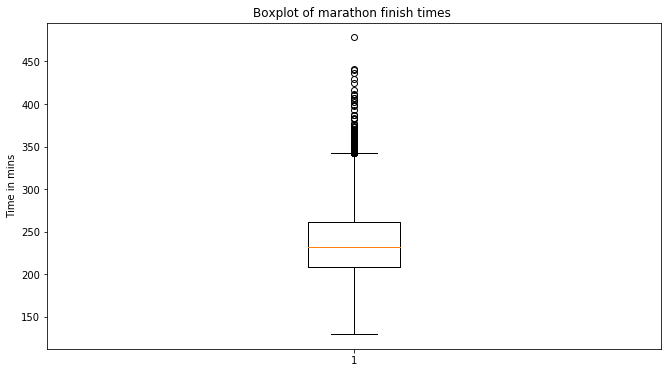

In [10]:
plt.figure(figsize=(11, 6))
plt.boxplot(graph_data['Converted Time'])
plt.title('Boxplot of marathon finish times ')
plt.ylabel('Time in mins')
plt.show()

From the histogram above we see that the participants on average finished the marathon couple of minutes under four hours.  With a variance of 1776.5 minutes and standard deviation of 42.15 minutes. The box in the boxplot the interquartile, includes all the data from the 25th percentile to the 75th percentile, with a red line at 238.1 mins, indicating the median finsih time.  We can also see that a portion of data points lie beyond 1.5 times the distance from the interquartile.  We can see that from the long tail in our histogram that these outliers skews our distribution to the right.   

Now that we have a gerneral idea of the distribution of our data we can try to answer some questions.  

#### Q1. Which country has the fastest runners?

Lets look at a graph of average marathon times of the 5 fastest countries.   


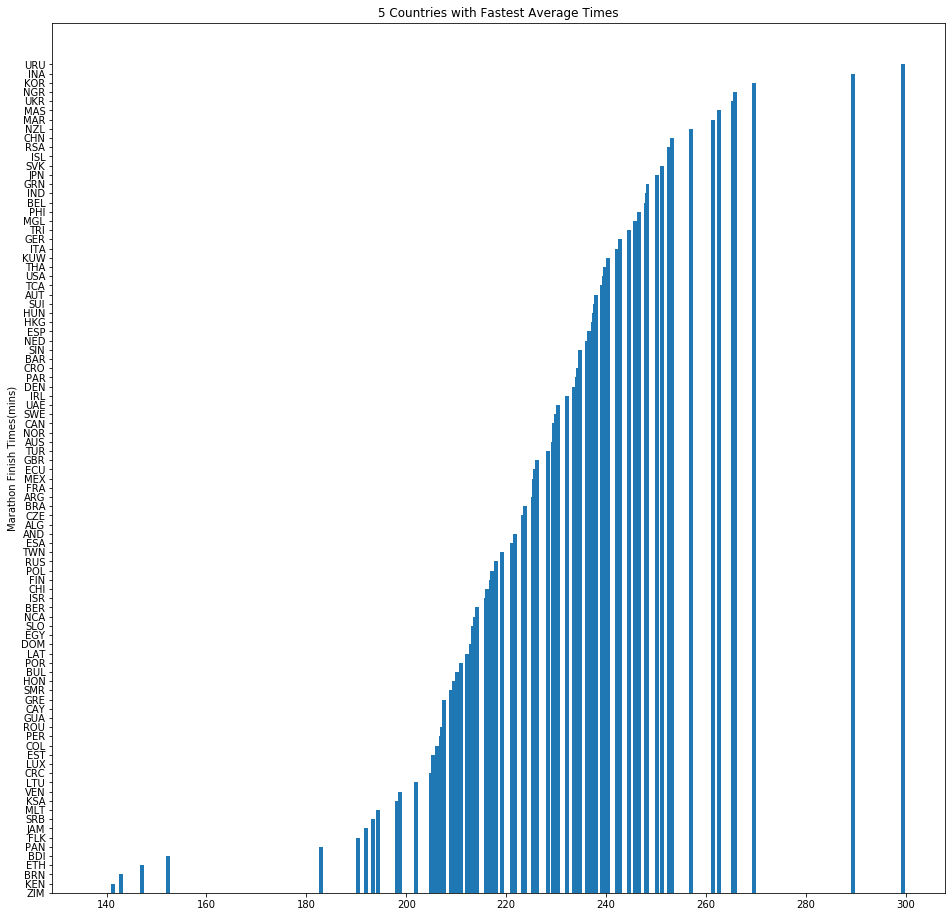

Country
ZIM    137.666667
KEN    141.320833
BRN    142.850000
ETH    147.146667
BDI    152.400000
Name: means, dtype: float64

In [37]:
graph_data_meantimes_per_country = pd.DataFrame()
graph_data_meantimes_per_country_1 = pd.DataFrame()

graph_data_meantimes_per_country['means'] = graph_data.groupby('Country')['Converted Time'].mean()
graph_data_meantimes_per_country_1['means'] = graph_data_meantimes_per_country.means.sort_values()

plt.figure(figsize=(16, 16))
plt.bar(graph_data_meantimes_per_country_1['means'], graph_data_meantimes_per_country_1.index)
plt.ylabel('Marathon Finish Times(mins)')
plt.title('5 Countries with Fastest Average Times')
plt.show()
graph_data_meantimes_per_country_1['means'].head()

After grouping the data by country and sorting by the fatest agverage times, we see that Zimbabwe had the fastest runners in 2017.  Some other countries were Kenya, Brunei, Ethiopia and Burundi.  

#### Q2. Do male runners finish marathons faster than female runners? 


Lets start by taking a look at a graph of our sample of runners by gender.  

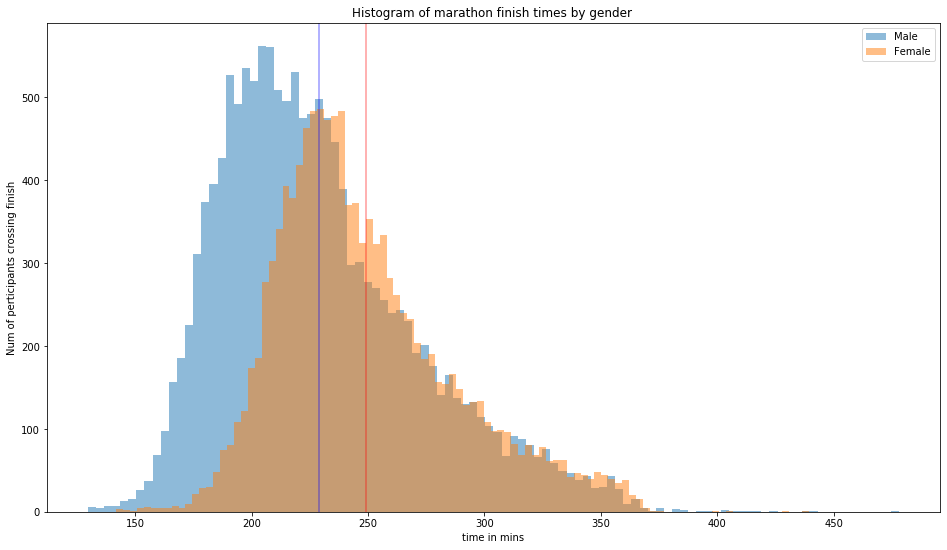

sample mean Male times    :  228.91147319573346
sample mean Female times  :  249.0913047109923
sample var Male times     :  1838.0403970329794
sample var Female times   :  1479.695508157526
sample std Male times     :  42.872373354329
sample std Female times   :  38.46681047549337
diff in mean M and F times:  20.179831515258826
number of men     :  14438
number of women   :  11972
total participants:  26410


In [12]:
graph_data_F = graph_data.loc[ graph_data['M/F'] == 'F' , 'Converted Time' ]
graph_data_M = graph_data.loc[ graph_data['M/F'] == 'M' , 'Converted Time']

plt.figure(figsize=(16, 9))
xy = graph_data_M
plt.hist(xy, bins=100, alpha=0.5, label='Male') 

xx = graph_data_F
plt.hist(xx, bins=100, alpha=0.5, label='Female')

plt.axvline(graph_data_M.mean(), color = 'b', alpha = .4)
plt.axvline(graph_data_F.mean(), color = 'r', alpha = .4)
plt.legend(loc='upper right') 

plt.ylabel('Num of perticipants crossing finish')
plt.title('Histogram of marathon finish times by gender ')
plt.xlabel('time in mins')
plt.show()

print('sample mean Male times    : ',graph_data_M.mean())
print('sample mean Female times  : ',graph_data_F.mean())
print('sample var Male times     : ',graph_data_M.var())
print('sample var Female times   : ',graph_data_F.var())
print('sample std Male times     : ',graph_data_M.std())
print('sample std Female times   : ',graph_data_F.std())
print('diff in mean M and F times: ',graph_data_F.mean() - graph_data_M.mean() )
print('number of men     : ', len(graph_data_M))
print('number of women   : ', len(graph_data_F))
print('total participants: ', len(graph_data_F)+len(graph_data_M))

Visually it looks like on average male runner seem to finish the marathon faster by 20 mins.  But I want to find out is this a significant difference?  Is it unlikely to see this difference due to chance alone? To put it in another way does this data set give us strong evidence that for the population of marathon enthusiasts, the mean marathon times for males is different than that of females? 


The Central Limit Theorem tells us that if we took the average marathon finish times from many observations, the sampling mean would approch the population mean.  Therefore we can use the difference in our sample means$(\bar{x}_1-\bar{x}_2)$ from our data as an estimator of the difference in the population means$(\bar{\mu}_1-\bar{\mu}_2)$.  We can also estimate the difference in population means with a confidence interval.
First we need to make a few assumptions:
1. Our samples are independent.  
2. Normally distributed population. 
3. Equal population variances.  

Since running is based on individual performance, its safe to assume independence.  The normality assumption is not very important for large sample sizes(more than 30), we have over 10,000 data points per group.  

The problem is we do not know the true population variances of the two groups, and replacing the population variance with the sample variance does not construct a t-statistic.  If we preforme a t-Test procedure, we would have assume that the population variances of the two groups are equal and pool the variances when calculating the standard error.  But from our data set the sampling variance of male and female are different.  Therefore I will use the  Welch unpooled t procedure so we don't have to make this assumption, and we only need assumption 1 and 2.  
#### Step 1: Calculate the standard error and degrees of freedom(Welch-Satterhwaite approximation).
I will write a few functions to give us the pieces we need.  


In [13]:
def welch_std_error(sample_var_1, sample_var_2, n_1, n_2):
    return (((sample_var_1/n_1)+(sample_var_2/n_2))**(1/2))

def welch_degree_freedom(sample_var_1, sample_var_2, n_1, n_2):
    return (((sample_var_1/n_1) + (sample_var_2/n_2))**2)/(((1/(n_1-1))*(sample_var_1/n_1)**2) + ((1/(n_2-1))*(sample_var_2/n_2)**2))

def confidence_interval_left(difference_of_sample_mean, t_value, standard_error):
    return difference_of_sample_mean - (t_value * standard_error)

def confidence_interval_right(difference_of_sample_mean, t_value, standard_error):
    return difference_of_sample_mean + (t_value * standard_error)

In [14]:
print('     standard error: ', welch_std_error( graph_data_M.var(),graph_data_F.var() , len(graph_data_M), len(graph_data_F)))
print('  degree of freedom: ', welch_degree_freedom(graph_data_M.var(),graph_data_F.var() , len(graph_data_M), len(graph_data_F)))
print('   sample mean male: ', graph_data_M.mean())
print(' sample mean female: ', graph_data_F.mean())
print('difference in means: ', graph_data_F.mean() - graph_data_M.mean())

     standard error:  0.5009012866930768
  degree of freedom:  26244.450925543
   sample mean male:  228.91147319573346
 sample mean female:  249.0913047109923
difference in means:  20.179831515258826


The standard error welch is $SE_W(\bar{X}_1-\bar{X}_2)= \left(\frac{S^2_1}{n_1}+\frac{S^2_2}{n_2}\right)^\frac{1}{2}$.

Here $S^2_1$ and $S^2_2$ are the sample variance of male and female runners. 

For example, the male variance is  $S^2_1$ $=$ $ \frac{\sum_{i=1}^{n_1} (x_{1i}-\bar{x_1})^2}{n_1-1} $, which we calculated with the $.var()$ method from above.  

#### Step 2: Find a 95% confidence interval $Y$ for the difference in sample means at $\alpha = 0.05$

Here's the formula for a confidence interval for the difference in population means with specified $\alpha$.

A $(1-\alpha)100$ % confidence interval for $\mu_1 - \mu_2$ is:

$(\bar{x}_1-\bar{x}_2)$  $-$  $(t_\frac{\alpha}{2}$ $\times SE_W)$   $\leqslant$   $Y$    $\leqslant$   $(\bar{x}_1-\bar{x}_2)$   $+$   $(t_\frac{\alpha}{2}$  $\times SE_W$) 

So all we need is $t_\frac{\alpha}{2}$ which we can look up on a table with the appropriate degrees of freedom.  

Where the degrees of freedom is $df_w = \frac{\left(\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}\right)^2}{\frac{1}{n_1-1} \left(\frac{s^2_1}{n_1}  \right)^2 + \frac{1}{n_2-1}\left(\frac{s^2_1}{n_2}  \right)^2} $

I used this website: http://www.ttable.org/student-t-value-calculator.html and found that $t_\frac{\alpha}{2}$ $=$ $1.9601$.  Now we just have to ask the confidence_interval functions what the boundaries sould be.   

In [15]:
print(' left boundary: ',confidence_interval_left(graph_data_F.mean() - graph_data_M.mean(), 1.9601, welch_std_error( graph_data_M.var(),graph_data_F.var() , len(graph_data_M), len(graph_data_F))))
print('right boundary: ',confidence_interval_right(graph_data_F.mean() - graph_data_M.mean(), 1.9601, welch_std_error( graph_data_M.var(),graph_data_F.var() , len(graph_data_M), len(graph_data_F))))

 left boundary:  19.198014903211725
right boundary:  21.161648127305927


This tells us that we can be 95% confident that the true difference in population mean is between 19.2 mins and 21.2 mins 
We can also look at this more formally with a hypothesis test.  



#### Step 3: Null hypothesis test

Null hypothesis: The population mean of male marathon times is the same as female times.
Alternative hypothesis: Male times are not the same as female times.

$H_0: \mu_1 = \mu_2$ $\ggg$ $\mu_1 - \mu_2 = 0$

$H_\alpha: \mu_1 \neq \mu_2$

Because we will use $\widehat{(\bar{x}_1-\bar{x}_2)}$ as an estimator for  $(\mu_1 - \mu_2)$ and the hypothesised value of the difference is $0$, the $t$ statistic can be constructed by:
$$t=\frac{\bar{x}_1-\bar{x}_2}{SE_W(\bar{x}_1-\bar{x}_2)}$$


In [16]:
t_score = (graph_data_F.mean() - graph_data_M.mean())/welch_std_error( graph_data_M.var(),graph_data_F.var() , len(graph_data_M), len(graph_data_F))
print('t_score: ',t_score)

t_score:  40.287042679576615


The p-value is double the area to the right of 40.287 on a t distribution with 26244 degrees of freedom.  The p-value < 0.00001.  I looked up here: https://www.socscistatistics.com/pvalues/tdistribution.aspx

The p-value is very small.  The smaller the p-value the greater the evidence against the null hypothesis.  We have a lot of evidence that the population means between male and female marathon times are different.  Therefore we should reject the Null hypothesis in favor of the alternative hypothesis, and conclude that there is a statstically significant difference between male and female marathon finish times.   

#### Q3. How do the marathon times change with age?

Let first take a look at summary statistics of the distribution by age. 

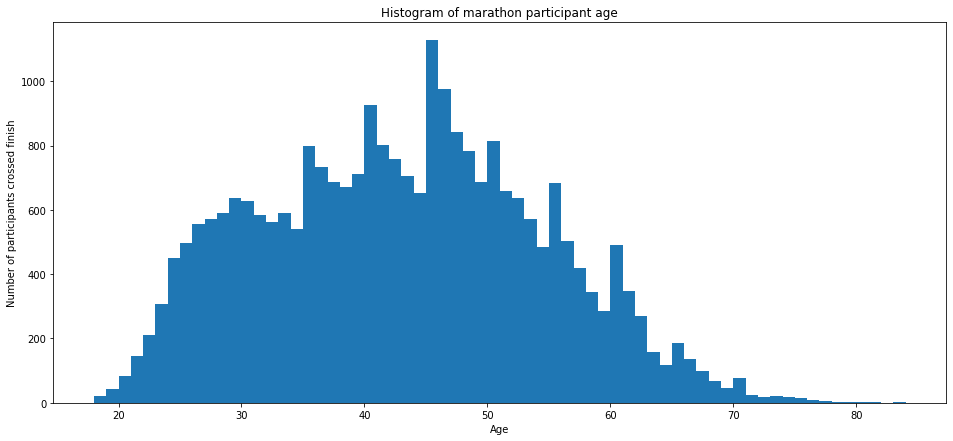

In [17]:

#This function take a column name, title, xlabel, ylabel and makes a histogram of one var.  
def histgrm_one_var(column_name, title, xlabel, ylabel):
    x = column_name
    plt.figure(figsize=(16, 7))
    plt.hist(x, bins= 84-18) 

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
# Takes graph_data['column_name'] and then takes three string arguments title, xlabel, ylabel in that order.  
# it plots a histogram by gender.  
def histgram_by_gender(column_name, title, xlabel, ylabel):
    F = graph_data.loc[ graph_data['M/F'] == 'F' , column_name]
    M = graph_data.loc[ graph_data['M/F'] == 'M' , column_name]
    plt.figure(figsize=(16, 7))
    plt.hist(M, bins=65, alpha = .5, label='Male')
    plt.hist(F, bins=65, alpha = .5, label='Female')
    
    plt.axvline(M.mean(), color = 'b', alpha = .4)
    #plt.axvline(M.mean()+M.std(), color = 'b', alpha = .4, linestyle = 'dashed')
    #plt.axvline(M.mean()-M.std(), color = 'b', alpha = .4, linestyle = 'dashed')

    plt.axvline(F.mean(), color = 'r', alpha = .4)
    #plt.axvline(F.mean() + F.std(), color = 'r', alpha = .4, linestyle = 'dashed')
    #plt.axvline(F.mean()-F.std(), color = 'r', alpha = .4, linestyle = 'dashed')


    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend(loc='upper right') 
    plt.show() 
    print('  male mean: ', M.mean())
    print('female mean: ',F.mean())
    print('   male std: ', M.std())
    print(' female std: ', F.std())
def CLT_sampling_by_gender(column_name, title, xlabel, ylabel):
    F = graph_data.loc[ graph_data['M/F'] == 'F' , column_name]
    M = graph_data.loc[ graph_data['M/F'] == 'M' , column_name]
    
    sampling_data_M_list = []
    for i in range(3000):
        sampling_data_M_list.append(np.random.choice(M, 50, replace=False).mean())  

    sampling_data_F_list = []
    for i in range(3000):
        sampling_data_F_list.append(np.random.choice(F, 50, replace=False).mean())

    %matplotlib inline

    plt.hist(sampling_data_M_list, bins=65, alpha = .5, label='Male') 
    plt.hist(sampling_data_F_list, bins=65, alpha = .5, label='Female') 

    Sampling_Data_M = pd.DataFrame()
    Sampling_Data_M['Sample Means'] = sampling_data_M_list
    Sampling_Data_F = pd.DataFrame()
    Sampling_Data_F['Sample Means'] = sampling_data_F_list

    plt.axvline(Sampling_Data_M['Sample Means'].mean(), color = 'b', alpha = .4)
    plt.axvline(Sampling_Data_M['Sample Means'].mean()+Sampling_Data_M['Sample Means'].std(), color = 'b', alpha = .4, linestyle = 'dashed')
    plt.axvline(Sampling_Data_M['Sample Means'].mean()-Sampling_Data_M['Sample Means'].std(), color = 'b', alpha = .4, linestyle = 'dashed')

    plt.axvline(Sampling_Data_F['Sample Means'].mean(), color = 'r', alpha = .4)
    plt.axvline(Sampling_Data_F['Sample Means'].mean()+Sampling_Data_F['Sample Means'].std(), color = 'r', alpha = .4, linestyle = 'dashed')
    plt.axvline(Sampling_Data_F['Sample Means'].mean()-Sampling_Data_F['Sample Means'].std(), color = 'r', alpha = .4, linestyle = 'dashed')

    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend(loc='upper right') 

    plt.show()

histgrm_one_var(graph_data['Age'], 'Histogram of marathon participant age', 'Age', 'Number of participants crossed finish')
#histgram_by_gender('Age', 'Histogram of marathon participant age by gender', 'Age in years', 'Num of participants crossing finish')
#CLT_sampling_by_gender('Age', 'Histogram sampling of marathon participant age by gender', 'Age', 'Num of participants')
#sample1M = np.random.choice(graph_data_M, 30, replace=False)
#sample1F = np.random.choice(graph_data_F, 30, replace=False)


Now lets plot the data set and see if there is a relationship between marathon times and the participants age.  

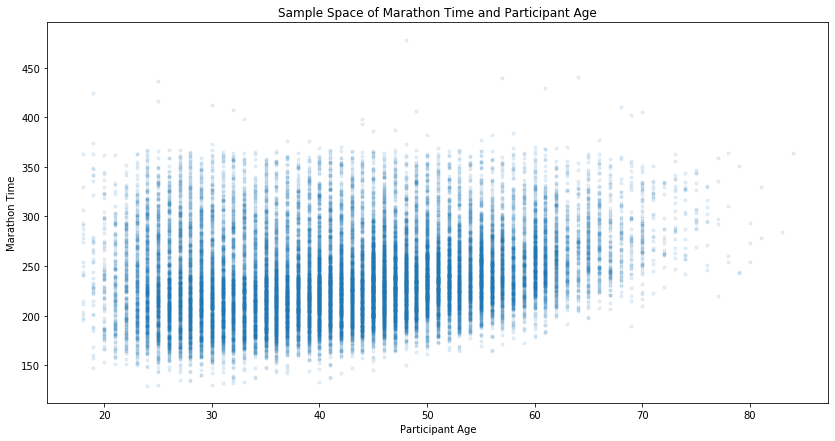

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(graph_data['Age'], graph_data['Converted Time'], '.', alpha=.1)
plt.title('Sample Space of Marathon Time and Participant Age')
plt.xlabel('Participant Age')
plt.ylabel('Marathon Time')
plt.show()


From the graph we can see that there is a possible relationship between age and marathon time. Also since our data set has signfically more participants at 40 years old comparied to 80 years old, we want to first give each age the same weight, which can be accomplished by looking at the relationship of average marathon times for each age.  The next graph will plot average marathon times against age.

Text(0, 0.5, 'Marathon Time')

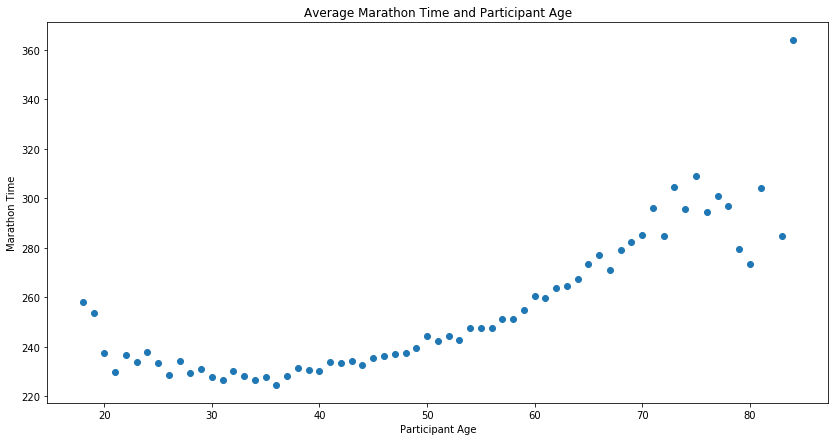

In [19]:
everyone = pd.DataFrame()
everyone['Mean Time']=graph_data.groupby('Age')['Converted Time'].mean()
everyone['Age'] = everyone.index
plt.figure(figsize=(14, 7))
plt.scatter(everyone['Age'], everyone['Mean Time'])
plt.title('Average Marathon Time and Participant Age')
plt.xlabel('Participant Age')
plt.ylabel('Marathon Time')

From the graph it looks like marathon times goes down with age until about 36 or 37.  Then after 37 marathon times starts going up with age.  Therefore we should investigate this relationship in two sections, from the interval 18 to 36 years, and then from 37 and older.  In the next graphs show the times vs age of the two intervals.  

In [20]:
first_interval_data = everyone.loc[everyone['Age'] <= 36]
second_interval_data = everyone.loc[everyone['Age'] >= 37]

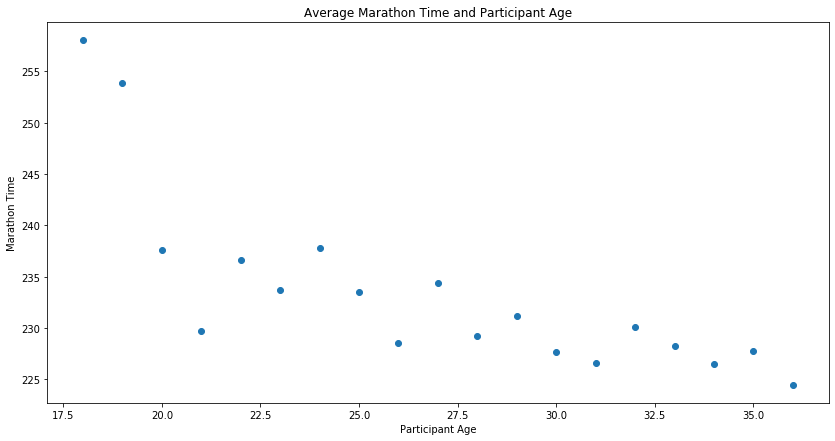

<function matplotlib.pyplot.show(*args, **kw)>

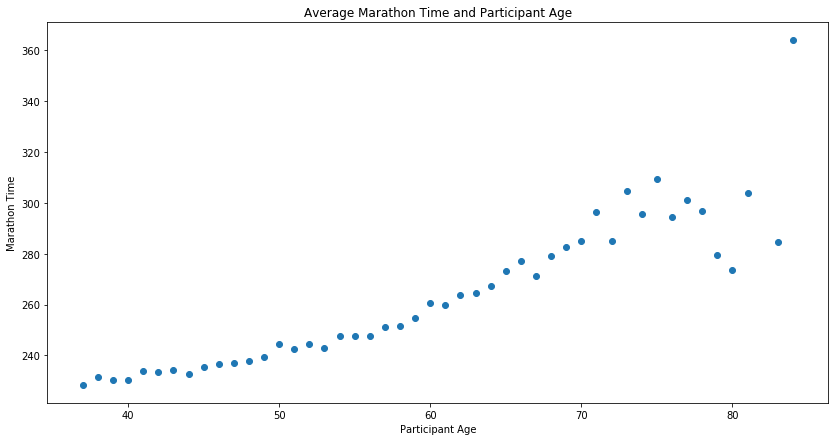

In [21]:
plt.figure(figsize=(14, 7))
plt.scatter(first_interval_data['Age'], first_interval_data['Mean Time'])
plt.title('Average Marathon Time and Participant Age')
plt.xlabel('Participant Age')
plt.ylabel('Marathon Time')
plt.show()

plt.figure(figsize=(14, 7))
plt.scatter(second_interval_data['Age'], second_interval_data['Mean Time'])
plt.title('Average Marathon Time and Participant Age')
plt.xlabel('Participant Age')
plt.ylabel('Marathon Time')
plt.show

Looking at the graph of the first interval, we can tell that the response variable(Marathon Time) decreases as the explanatory variable(Participant Age) increases.  We can say that marathon times are dependent on the participants age.  We might want to quantify this relationship so that we can make predictions with our data.  The question is can we use a known explanatory value, to predict a reponse?  Asked in another way, for every year a runner's age increase, how much can I expect the average time to decrease?  I can answer this question by drawing a 'well fitting' line through the points and then use that line to make the prediction.  

How can we find this line?  If we assume that this relationship is linear then the line must be of the form $y = mx + b$.  But how can we find the parameters $m$(slop) and $b$($y$ intercept)?  A common method used to estimate these two parameters is by method of least squares.

Next I will change the DataFrame to have the component lists I need to perform least squares regression procedure.  

In [22]:
x_bar = first_interval_data['Age'].mean()
y_bar = first_interval_data['Mean Time'].mean()

x_minus_xbar = []
var_x = []
y_minus_ybar = []
cov_xy = []

for i in range(len(first_interval_data.index)):
    i = i+18
    x_minus_xbar.append(i - x_bar) 
    var_x.append((i - x_bar)**2)
    y_minus_ybar.append(first_interval_data['Mean Time'][i] - y_bar) 
    cov_xy.append((first_interval_data['Mean Time'][i] - y_bar)*(i - x_bar) )

first_interval_data['x - xbar'] =  x_minus_xbar
first_interval_data['var(x)'] = var_x
first_interval_data['y - ybar'] = y_minus_ybar
first_interval_data['cov(x,y)'] = cov_xy


c:\users\jiedo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
c:\users\jiedo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\jiedo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [23]:
first_interval_data.head()

,Mean Time,Age,x - xbar,var(x),y - ybar,"cov(x,y)"
Age,,,,,,
18,258.100000,18,-9.0,81.0,24.648357,-221.835215
19,253.846899,19,-8.0,64.0,20.395256,-163.162052
20,237.564859,20,-7.0,49.0,4.113217,-28.792517
21,229.729932,21,-6.0,36.0,-3.721711,22.330265
22,236.613889,22,-5.0,25.0,3.162246,-15.811231


It can be shown that m, the parameter for the slop of the least square regression line is the sum of the ratio between the $Cov(age, time)$ and $Var(age)$.

$m=\frac{Cov(age, time)}{Var(age)}=\frac{\sum_{i=1}^{n}(x_1-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$


In [24]:
m = first_interval_data['cov(x,y)'].sum()/first_interval_data['var(x)'].sum()
print('m is: ', m)

m is:  -1.217219886283516


Now that we have the slope parameter how  do we get y intercept?  Well it turns out that the regression line must pass through the mean of all the x and y componets, which we already calculated.  

In [25]:
print('regression line must pass through point P(', x_bar, ',', y_bar,')')

regression line must pass through point P( 27.0 , 233.45164278695637 )


 since;        y = mx + b

therefore; b = y - mx

and; b = 233.5 - (-1.217 x 27)

In [26]:
b = 233.5 - (-1.217 * 27)
print('b is: ', b)
print('y =',m,'x + ',b  )

b is:  266.359
y = -1.217219886283516 x +  266.359


The function y will take ages and map it to a 'well fitting' line through the observed mean times.  Then we can use that line to make the prediction and answer the question.  

Next I plot the reguesstion against our observation and see if its reasonable.   

In [27]:
x = [i for i in range(18,37)]
y = []
for i in range(18,37):
    y.append(-1.21721988*i+266.359)

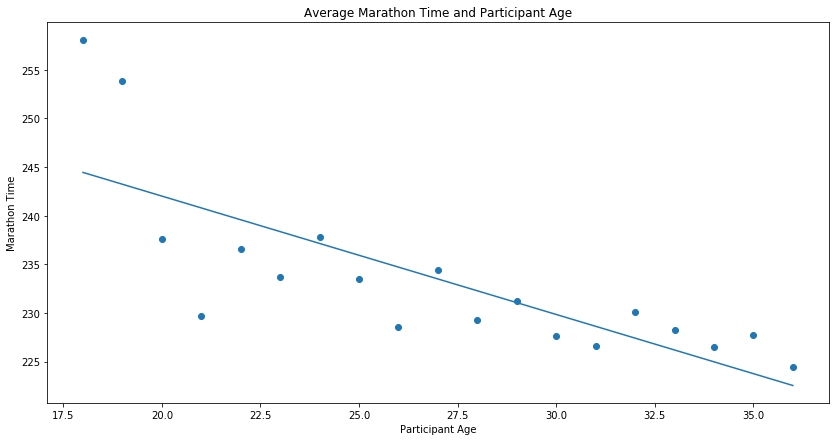

In [28]:
plt.figure(figsize=(14, 7))
plt.scatter(first_interval_data['Age'], first_interval_data['Mean Time'])
plt.title('Average Marathon Time and Participant Age')
plt.xlabel('Participant Age')
plt.ylabel('Marathon Time')
plt.plot(x,y)
plt.show()


Since the graph looks reasonable, I can go ahead and use it to make a perdiction and answer the question of how do the marathon times change with age.  It turns out that the slop of the regression line is the change in marathon time with respect to age. We can say between the ages of 18 to 36, for every year a runner ages, the average time for that age group will decrease by 1.2 minutes.  We are not saying this is a causal response.  There is not necessarily a causal link between age and marathon time.  We can only say that there is a relationship between age and marathon time.        

In a similar way we can preform regression procedures for the second interval.  

#### Future research

To make statistical inferences, we need to make a few assumptions about our model.  In general our model look like this: $$Y= \beta_0 + \beta_1X + \epsilon $$ Here $\beta_1$  and $\beta_0$ are the slop and intercept parameters and $\epsilon$ is a random error componet.  The random error componet is a random variable that: 
1. Has a mean of $0$.
2. Is normally distributed. 
3. Has constant variance ($\sigma^2$) at every value of $x$

The error terms are assumed to be independent, therefore $\epsilon$ is $N(0, \sigma^2)$, normally distributed with mean $0$ and variance $\sigma^2$.
Since $Y= \beta_0 + \beta_1X + \epsilon $, these assumptions imply that for a given $X$, the observsed $Ys$ are $ N(\beta_0 + \beta_1X, \sigma^2)$, normally distributed about the line $\beta_0 + \beta_1X$ with variance $\sigma^2$.

We could investigate $\epsilon$ to see if we have a good model by ploting the distance from the oberved data to the predicted value(random error) and see if there is a clear pattern.  We can see if there is a response in errors for varying ages. If the trend in the error terms are constant then we could use our data to make inferences on parameters in the model such as $\beta_0$ and $\beta_1$. We would be able to come up with a $(1-\alpha)100$% confidence interval for $\beta_0$ and $\beta_1$.  We could aslo make statements formally with a Null hypothesis test.  For example at $\alpha = 0.05$ with $H_0$: $\beta_1 = 0$ and $H_\alpha$: $\beta_1 \not= 0$.  We can preform $t$ procedure and look up $p$ value in tables. If the $p$ value is small, we can say we reject the $H_0$ in favor of $H_\alpha$ and conclude that a relationship exists.  

We could also set a maximum value for $\epsilon$.  We could write a function so that if the residuals get too large the function will divide the interval into smaller intervals and recalculate the regression until the errors becomes acceptable.   

In [29]:
graph_data.head()

,M/F,State,Country,Age,Converted Time
0,M,NaN,KEN,24,129.616667
1,M,OR,USA,30,129.966667
2,M,NaN,JPN,25,130.466667
3,M,CA,USA,32,132.133333
4,M,NaN,KEN,31,132.583333
